<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Arboles_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Arbol de clasificación 
##Importar librerías 
#Tratamiento de datos 
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Graficos
import matplotlib.pyplot as plt

#Procesamiento y modelado 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importar datos
carseats = sm.datasets.get_rdataset("Carseats","ISLR")
datos = carseats.data
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

In [6]:
#Exploración de datos
datos.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
datos.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
datos.describe(include = 'object')

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f621070af90>,
      dtype=object)

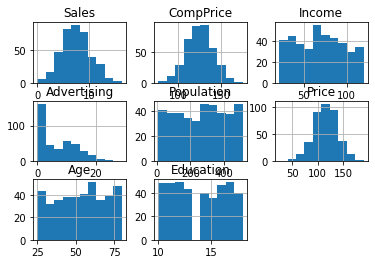

In [9]:
datos.hist()

In [12]:
#Construir nuestra clase (y)
datos['ventasAltas'] = np.where(datos.Sales > 8,0,1)
datos=datos.drop(columns='Sales')
datos.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ventasAltas
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,1


In [14]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(datos.drop(columns='ventasAltas'),
                                                                    datos['ventasAltas'],
                                                                    train_size=0.7,
                                                                    random_state=123)

In [24]:
#Codificar variables categóricas
catCol = xEntrenamiento.select_dtypes(include= ['object','category'] ).columns.to_list()
numCol = xEntrenamiento.select_dtypes(include= ['float64','int64'] ).columns.to_list()

preprocesador = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown = 'ignore'),catCol)],remainder = 'passthrough')


xEntrenamientoPre =preprocesador.fit_transform(xEntrenamiento)
xPruebaPre = preprocesador.fit_transform(xPrueba)

In [26]:
codCat=preprocesador.named_transformers_['onehot'].get_feature_names(catCol)
labels = np.concatenate([codCat,numCol])

xEntrenamientoProc = pd.DataFrame(xEntrenamientoPre, columns=labels)
xPruebaPro = pd.DataFrame(xPruebaPre, columns=labels)

xEntrenamientoProc.info()
                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ShelveLoc_Bad     280 non-null    float64
 1   ShelveLoc_Good    280 non-null    float64
 2   ShelveLoc_Medium  280 non-null    float64
 3   Urban_No          280 non-null    float64
 4   Urban_Yes         280 non-null    float64
 5   US_No             280 non-null    float64
 6   US_Yes            280 non-null    float64
 7   CompPrice         280 non-null    float64
 8   Income            280 non-null    float64
 9   Advertising       280 non-null    float64
 10  Population        280 non-null    float64
 11  Price             280 non-null    float64
 12  Age               280 non-null    float64
 13  Education         280 non-null    float64
dtypes: float64(14)
memory usage: 30.8 KB


In [27]:
xEntrenamientoProc.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,138.0,72.0,0.0,148.0,94.0,27.0,17.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,104.0,100.0,8.0,398.0,97.0,61.0,11.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,124.0,113.0,13.0,501.0,72.0,78.0,16.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,116.0,40.0,0.0,74.0,97.0,76.0,15.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,141.0,57.0,13.0,376.0,158.0,64.0,18.0


In [28]:
#Modelar los datos 
modelo = DecisionTreeClassifier(max_depth=5,
                                criterion='gini',
                                random_state=123)

In [30]:
modelo.fit(xEntrenamientoProc,yEntrenamiento)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del arbol: 5
Número de nodos terminales: 23


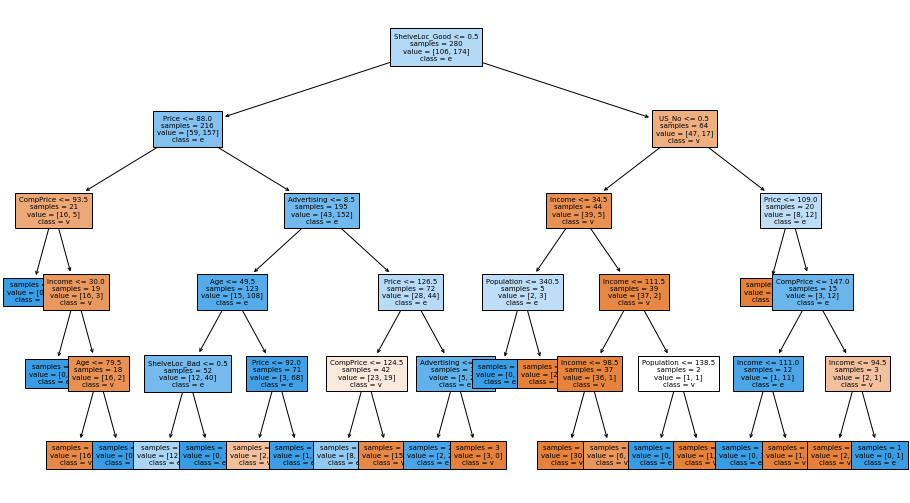

In [32]:
fig,ax=plt.subplots(figsize=(16,9))
print(f"Profundidad del arbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                feature_names = labels.tolist(),
                class_names='ventasAltas',
                filled=True,
                impurity=False,
                fontsize=7,
                ax=ax)

In [33]:
##Evaluar el modelo 
predicciones = modelo.predict(xPruebaPro)
#Matriz ed confusión en entrenamiento 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = yEntrenamiento,
                 y_pred=modelo.predict(xEntrenamientoProc))

Matriz de confusión
----------------------------------------


array([[ 83,  23],
       [  4, 170]])

In [34]:
#Desempeño en entrenamiento 
accuracyEnt = accuracy_score(y_true= yEntrenamiento,
                             y_pred=modelo.predict(xEntrenamientoProc))

print(f"El dedsempeño en entrenamiento es:{accuracyEnt}")

El dedsempeño en entrenamiento es:0.9035714285714286


In [35]:
##Evaluar el modelo  en prueba
predicciones = modelo.predict(xPruebaPro)
#Matriz ed confusión en entrenamiento 
print('Matriz de confusión')
print('----------------------------------------')
confusion_matrix(y_true = yPrueba,
                 y_pred=predicciones)

Matriz de confusión
----------------------------------------


array([[30, 28],
       [ 7, 55]])

In [36]:
#Desempeño en prueba
accuracyEnt = accuracy_score(y_true= yPrueba,
                             y_pred=predicciones)

print(f"El dedsempeño en entrenamiento es:{accuracyEnt}")

El dedsempeño en entrenamiento es:0.7083333333333334
